In [1382]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [5]:
#load the dataset
df=pd.read_csv(r"C:\Users\hp\Downloads\Stock market analysis\AAPL.csv")

In [1384]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [1385]:
#display first 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [1386]:
#display last 5 rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [1387]:
#shape of dataset
df.shape

(2011, 7)

In [1388]:
#column names
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [1389]:
#checking null values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [1390]:
#checking duplicate values
df.duplicated().sum()

0

In [1391]:
#unique values in all columns
df.nunique()

,0
Date,2011
Open,1909
High,1900
Low,1905
Close,1912
Adj Close,1983
Volume,2006


In [1392]:
#unique values in close
df['Close'].unique()

array([ 58.747143,  59.062859,  59.718571, ..., 289.910004, 289.799988,
       291.519989])

In [1393]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [1394]:
# Converting Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [1395]:
#setting date column as index
df.set_index('Date', inplace=True)

In [1396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [1397]:
#basic statistical information
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [1398]:
#correlation
z=df.corr(numeric_only=True)
z

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000


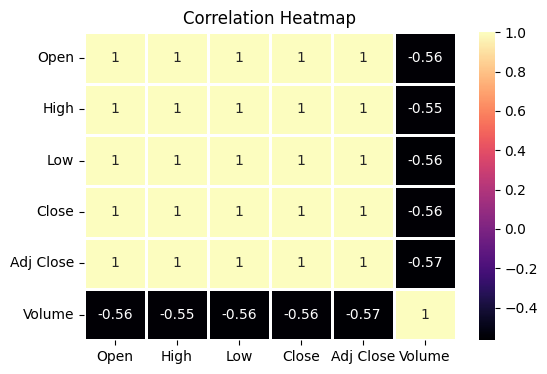

In [1399]:
#heatmap
plt.figure(figsize=(6,4))
sns.heatmap(z,annot=True, cmap='magma',linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

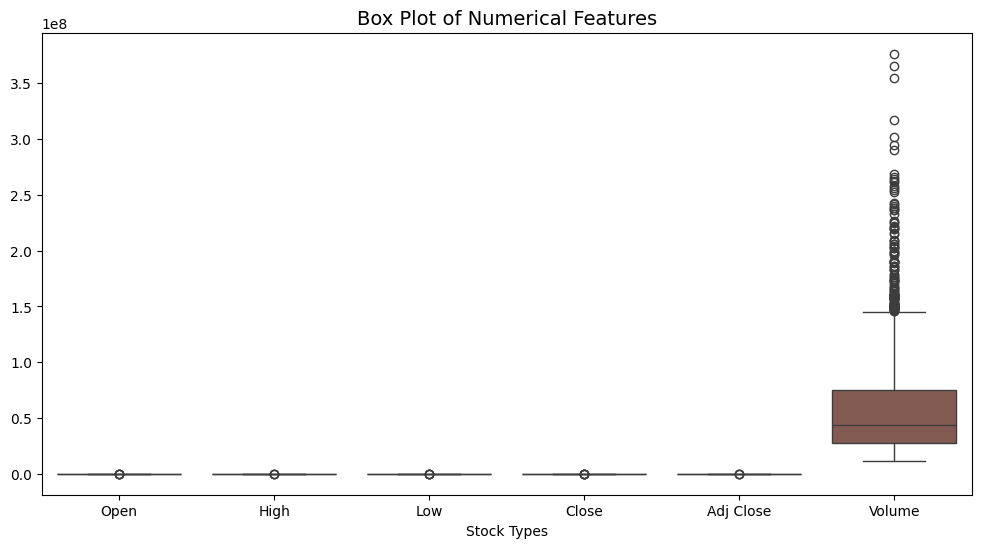

In [1400]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Box Plot of Numerical Features", fontsize=14)
plt.xlabel("Stock Types")
plt.show()

In [1401]:
df.drop(columns=['Volume'], inplace=True)

In [1402]:
df.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932


In [1403]:
#data normalization
scaler = MinMaxScaler()
scaler_values = scaler.fit_transform(df[df.columns])

In [1404]:
print(scaler_values)

[[0.0129889  0.00777957 0.01464693 0.01254462 0.00766324]
 [0.01335257 0.00909427 0.01481853 0.01388393 0.00879718]
 [0.01635281 0.01142814 0.01689608 0.01666555 0.01115228]
 ...
 [0.97327067 0.98315638 0.98532862 0.99317022 0.99335426]
 [1.         1.         1.         0.99270351 0.99290018]
 [0.992957   0.99459652 0.98755932 1.         1.        ]]


In [1405]:
#converting scaler values array into dataframe
df_scaledData = pd.DataFrame(scaler_values, columns=df.columns, index=df.index)

In [1406]:
df_scaledData.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2012-01-03,0.012989,0.007780,0.014647,0.012545,0.007663
2012-01-04,0.013353,0.009094,0.014819,0.013884,0.008797
2012-01-05,0.016353,0.011428,0.016896,0.016666,0.011152
2012-01-06,0.019274,0.013961,0.020910,0.019314,0.013394
2012-01-09,0.022747,0.016976,0.022216,0.018908,0.013051


**Data Visualization**

Text(0, 0.5, 'Frequency')

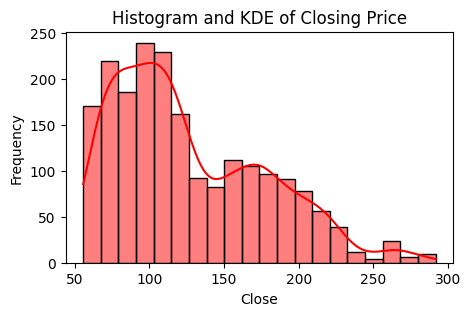

In [1407]:
#histogram with kde of closing price
plt.figure(figsize=(5, 3))
sns.histplot(df['Close'], bins=20, kde=True, color='red')
plt.title(f'Histogram and KDE of Closing Price')
plt.xlabel("Close")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

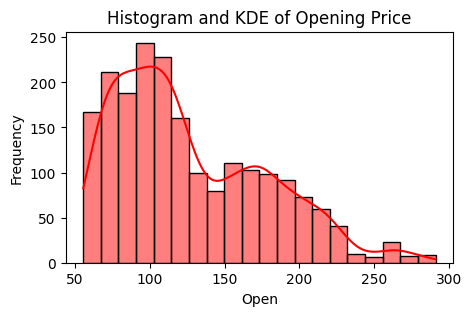

In [1408]:
#histogram with kde of opening price
plt.figure(figsize=(5, 3))
sns.histplot(df['Open'], bins=20, kde=True, color='red')
plt.title(f'Histogram and KDE of Opening Price')
plt.xlabel("Open")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

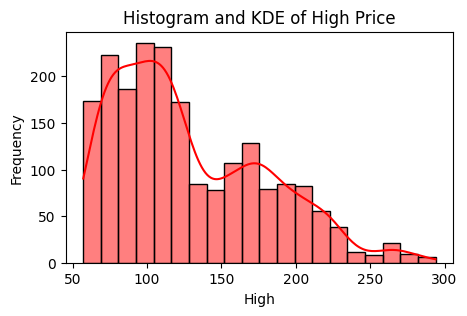

In [1409]:
#histogram with kde of high price
plt.figure(figsize=(5, 3))
sns.histplot(df['High'], bins=20, kde=True, color='red')
plt.title(f'Histogram and KDE of High Price')
plt.xlabel("High")
plt.ylabel("Frequency")

<Figure size 1400x600 with 0 Axes>

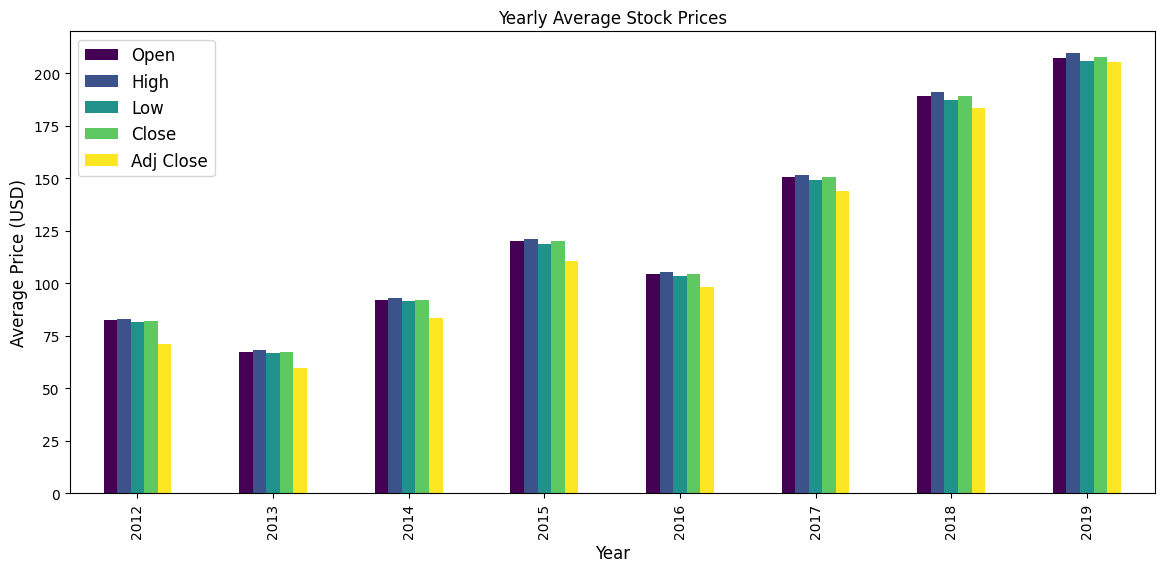

In [1410]:
#Bar Chart for Yearly Average Prices
df['Year'] = df.index.year
yearly_avg = df.groupby('Year').mean()

plt.figure(figsize=(14, 6))
yearly_avg[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='bar', figsize=(14, 6), colormap='viridis')
plt.title("Yearly Average Stock Prices", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.legend(fontsize=12)
plt.show()

We infer in all years **High** stock price type has the highest average.

In [1411]:
# Calculate Simple Moving Averages for Close price
df_scaledData['SMA_40'] = df_scaledData['Close'].rolling(40, min_periods=1).mean()
df_scaledData['SMA_80'] = df_scaledData['Close'].rolling(80, min_periods=1).mean()

In [1412]:
# Calculate Cumulative Moving Average for Close price
df_scaledData['CMA'] = df_scaledData['Close'].expanding().mean()

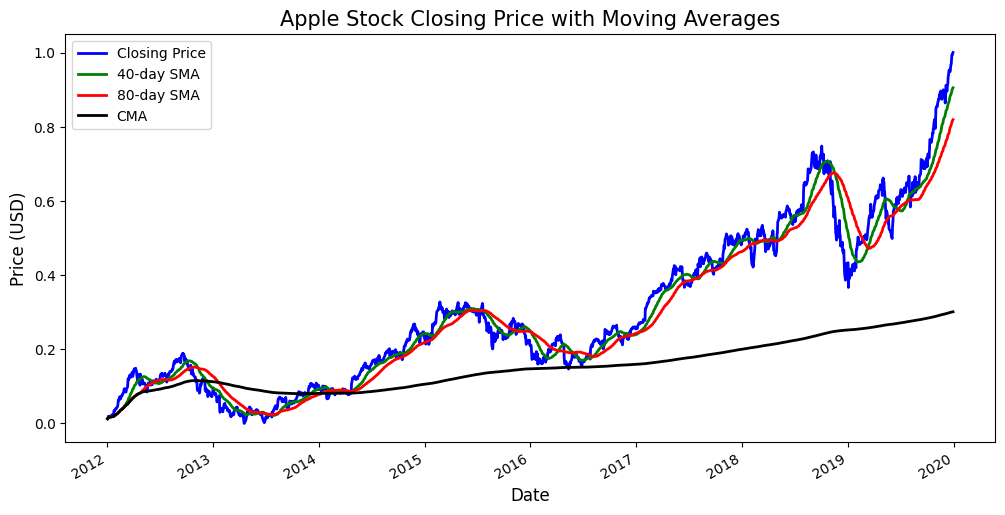

In [1413]:
# Plot closing price SMAs and CMAs
colors = ['blue', 'green', 'red', 'black']
df_scaledData[['Close', 'SMA_40', 'SMA_80', 'CMA']].plot(color=colors, linewidth=2, figsize=(12, 6))
plt.legend(labels=['Closing Price', '40-day SMA', '80-day SMA', 'CMA'], fontsize=10)
plt.title('Apple Stock Closing Price with Moving Averages', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.show()

In [1414]:
# Calculate Simple Moving Averages for Open price
df_scaledData['SMA_40'] = df_scaledData['Open'].rolling(40, min_periods=1).mean()
df_scaledData['SMA_80'] = df_scaledData['Open'].rolling(80, min_periods=1).mean()

In [1415]:
# Calculate Cumulative Moving Average for Open price
df_scaledData['CMA'] = df_scaledData['Open'].expanding().mean()

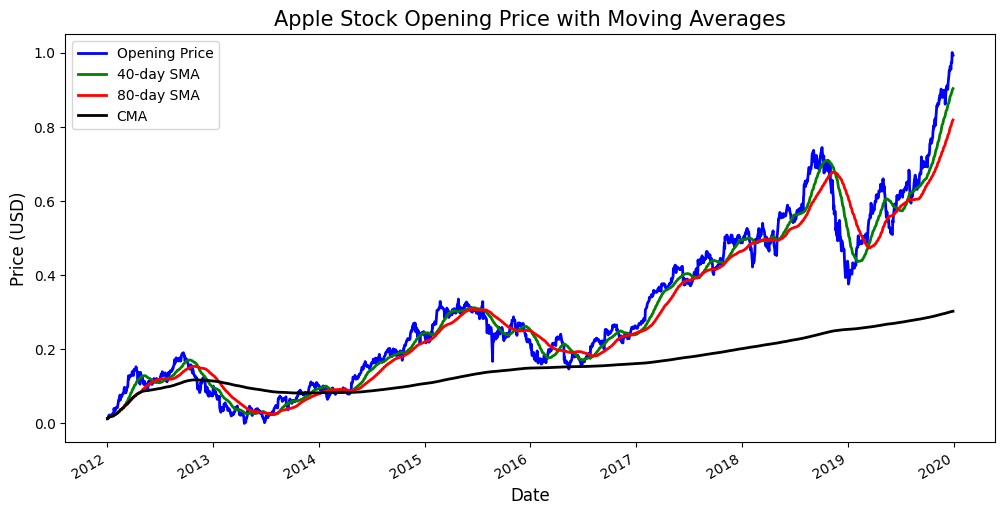

In [1416]:
# Plot opening price SMAs and CMAs
colors = ['blue', 'green', 'red','black']
df_scaledData[['Open', 'SMA_40', 'SMA_80', 'CMA']].plot(color=colors, linewidth=2, figsize=(12, 6))
plt.legend(labels=['Opening Price', '40-day SMA', '80-day SMA', 'CMA'], fontsize=10)
plt.title('Apple Stock Opening Price with Moving Averages', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.show()

In [1417]:
# Calculate Simple Moving Averages for High price
df_scaledData['SMA_40'] = df_scaledData['High'].rolling(40, min_periods=1).mean()
df_scaledData['SMA_80'] = df_scaledData['High'].rolling(80, min_periods=1).mean()

In [1418]:
# Calculate Cumulative Moving Average for High price
df_scaledData['CMA'] = df_scaledData['High'].expanding().mean()

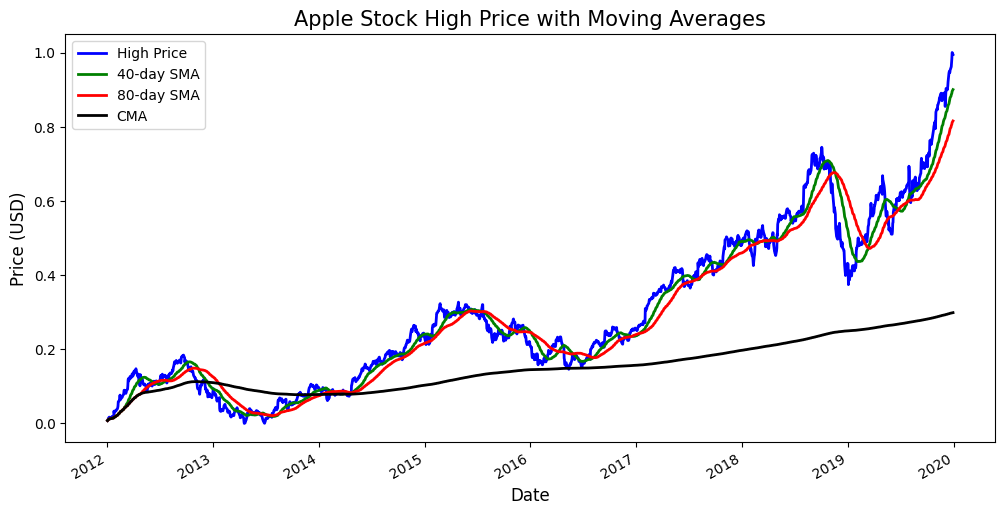

In [1419]:
# Plot High price SMAs and CMAs
colors = ['blue', 'green', 'red','black']
df_scaledData[['High', 'SMA_40', 'SMA_80', 'CMA']].plot(color=colors, linewidth=2, figsize=(12, 6))
plt.legend(labels=['High Price', '40-day SMA', '80-day SMA','CMA'], fontsize=10)
plt.title('Apple Stock High Price with Moving Averages', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.show()

In [1420]:
# Calculate Simple Moving Averages for Low price
df_scaledData['SMA_40'] = df_scaledData['Low'].rolling(40, min_periods=1).mean()
df_scaledData['SMA_80'] = df_scaledData['Low'].rolling(80, min_periods=1).mean()

In [1421]:
# Calculate Cumulative Moving Average for Low price
df_scaledData['CMA'] = df_scaledData['Low'].expanding().mean()

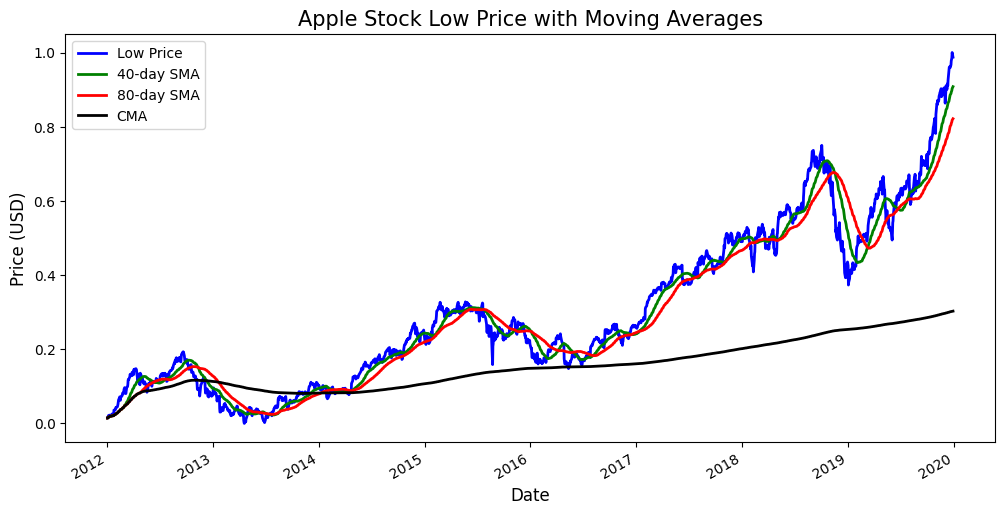

In [1422]:
# Plot Low price SMAs and CMAs
colors = ['blue', 'green', 'red','black']
df_scaledData[['Low', 'SMA_40', 'SMA_80','CMA']].plot(color=colors, linewidth=2, figsize=(12, 6))
plt.legend(labels=['Low Price', '40-day SMA', '80-day SMA','CMA'], fontsize=10)
plt.title('Apple Stock Low Price with Moving Averages', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.show()

Series is **not stationary** for all columns

In [1423]:
# Applying first-order differencing to make series stationary
df_scaledData['Close_diff'] = df_scaledData['Close'].diff()

In [1424]:
# Calculate Simple Moving Averages for Close price
df_scaledData['SMA_50'] = df_scaledData['Close_diff'].rolling(50, min_periods=1).mean()
df_scaledData['SMA_150'] = df_scaledData['Close_diff'].rolling(150, min_periods=1).mean()

In [1425]:
# Calculate Cumulative Moving Average for Close price
df_scaledData['CMA'] = df_scaledData['Close_diff'].expanding().mean()

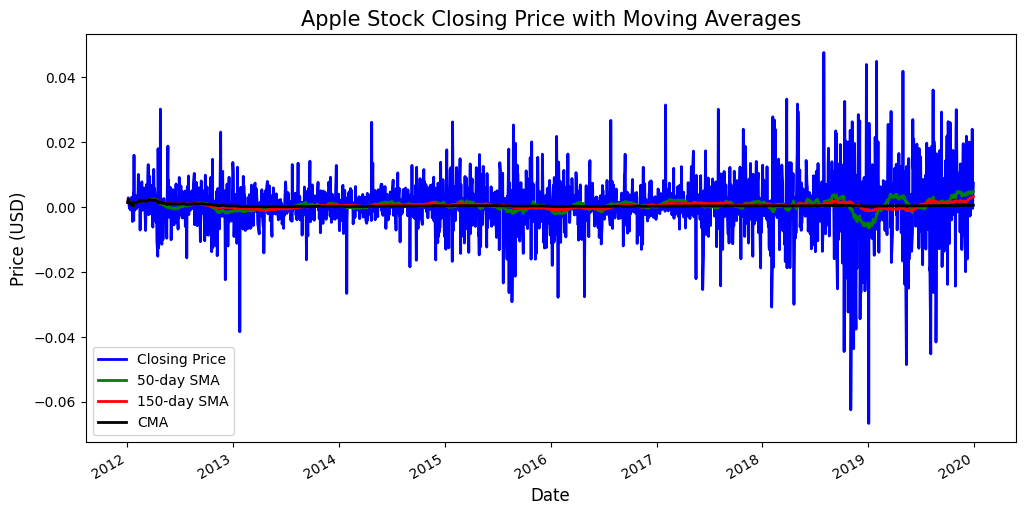

In [1426]:
# Plot closing price SMAs and CMAs
colors = ['blue', 'green', 'red', 'black']
df_scaledData[['Close_diff', 'SMA_50', 'SMA_150', 'CMA']].plot(color=colors, linewidth=2, figsize=(12, 6))
plt.legend(labels=['Closing Price', '50-day SMA', '150-day SMA', 'CMA'], fontsize=10)
plt.title('Apple Stock Closing Price with Moving Averages', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.show()

In [1427]:
df_scaledData['Open_diff'] = df_scaledData['Open'].diff()

In [1428]:
# Calculate Simple Moving Averages for Open price
df_scaledData['SMA_50'] = df_scaledData['Open_diff'].rolling(50, min_periods=1).mean()
df_scaledData['SMA_150'] = df_scaledData['Open_diff'].rolling(150, min_periods=1).mean()

In [1429]:
# Calculate Cumulative Moving Average for Open price
df_scaledData['CMA'] = df_scaledData['Open_diff'].expanding().mean()

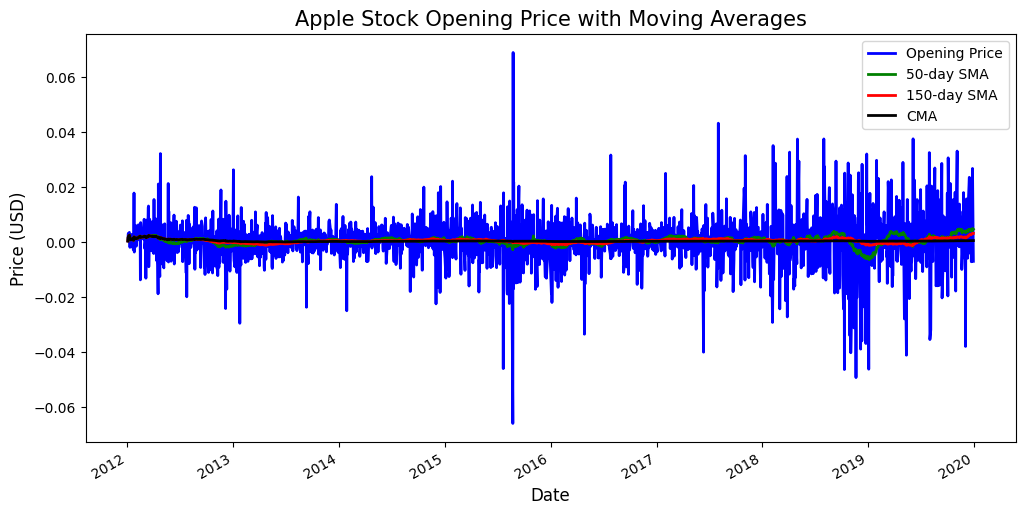

In [1430]:
# Plot opening price SMAs and CMAs
colors = ['blue', 'green', 'red','black']
df_scaledData[['Open_diff', 'SMA_50', 'SMA_150', 'CMA']].plot(color=colors, linewidth=2, figsize=(12, 6))
plt.legend(labels=['Opening Price', '50-day SMA', '150-day SMA', 'CMA'], fontsize=10)
plt.title('Apple Stock Opening Price with Moving Averages', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.show()

In [1431]:
df_scaledData['High_diff'] = df_scaledData['High'].diff()

In [1432]:
# Calculate Simple Moving Averages for High price
df_scaledData['SMA_50'] = df_scaledData['High_diff'].rolling(50, min_periods=1).mean()
df_scaledData['SMA_150'] = df_scaledData['High_diff'].rolling(150, min_periods=1).mean()

In [1433]:
# Calculate Cumulative Moving Average for High price
df_scaledData['CMA'] = df_scaledData['High_diff'].expanding().mean()

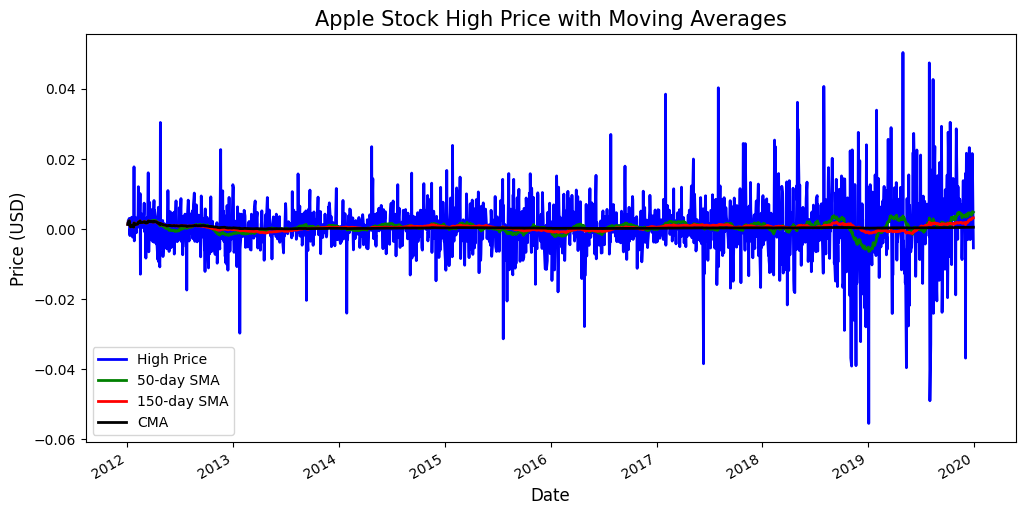

In [1434]:
# Plot High price SMAs and CMAs
colors = ['blue', 'green', 'red','black']
df_scaledData[['High_diff', 'SMA_50', 'SMA_150', 'CMA']].plot(color=colors, linewidth=2, figsize=(12, 6))
plt.legend(labels=['High Price', '50-day SMA', '150-day SMA','CMA'], fontsize=10)
plt.title('Apple Stock High Price with Moving Averages', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.show()

In [1435]:
df_scaledData['Low_diff'] = df_scaledData['Low'].diff()

In [1436]:
# Calculate Simple Moving Averages for Low price
df_scaledData['SMA_50'] = df_scaledData['Low_diff'].rolling(50, min_periods=1).mean()
df_scaledData['SMA_150'] = df_scaledData['Low_diff'].rolling(150, min_periods=1).mean()

In [1437]:
# Calculate Cumulative Moving Average for Low price
df_scaledData['CMA'] = df_scaledData['Low_diff'].expanding().mean()

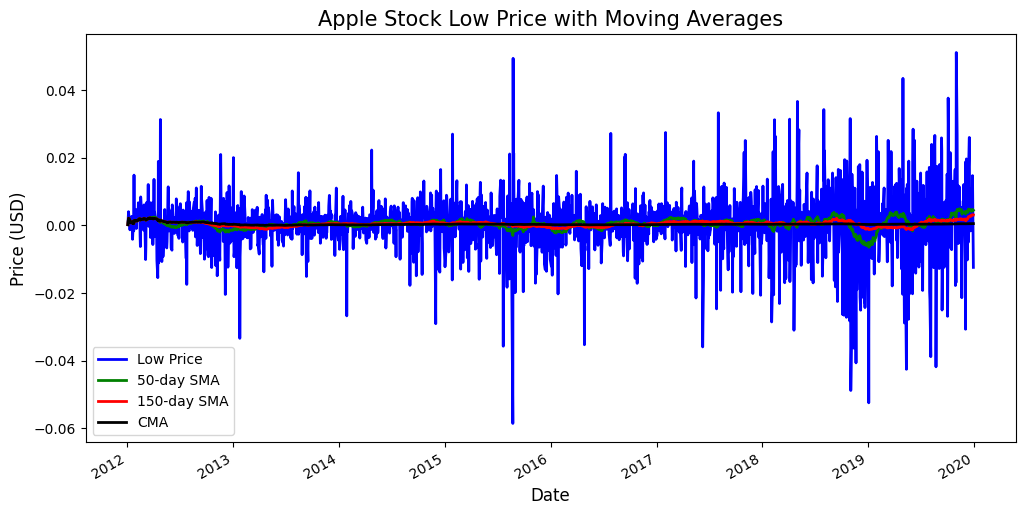

In [1438]:
# Plot Low price SMAs and CMAs
colors = ['blue', 'green', 'red','black']
df_scaledData[['Low_diff', 'SMA_50', 'SMA_150','CMA']].plot(color=colors, linewidth=2, figsize=(12, 6))
plt.legend(labels=['Low Price', '50-day SMA', '150-day SMA','CMA'], fontsize=10)
plt.title('Apple Stock Low Price with Moving Averages', fontsize=15)

plt.xlabel('Date', fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.show()

Series is **stationary** for all columns

In [1439]:
df_scaledData.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
SMA_40,0
SMA_80,0
CMA,1
Close_diff,1
SMA_50,1


In [1440]:
df_scaledData = df_scaledData.fillna(df_scaledData.mean())

In [1441]:
df_scaledData.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
SMA_40,0
SMA_80,0
CMA,0
Close_diff,0
SMA_50,0


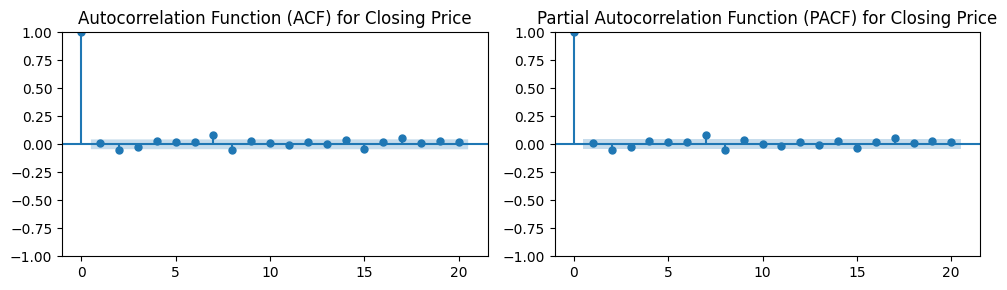

In [1442]:
#Autocorrelation and Partial Autocorrelation for close price
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plot_acf(df_scaledData['Close_diff'].dropna(), ax=axes[0], lags=20)
axes[0].set_title("Autocorrelation Function (ACF) for Closing Price")
plot_pacf(df_scaledData['Close_diff'].dropna(), ax=axes[1], lags=20)
axes[1].set_title("Partial Autocorrelation Function (PACF) for Closing Price")
plt.tight_layout()
plt.show()

In [1443]:
df_scaledData['Close_diff1'] = df_scaledData['Close_diff'].diff()

In [1444]:
df_scaledData = df_scaledData.fillna(df_scaledData.mean())

In [1445]:
df_scaledData.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
SMA_40,0
SMA_80,0
CMA,0
Close_diff,0
SMA_50,0


In [1446]:
X = df_scaledData['Close_diff1'].values
X.size

2011

In [1447]:
train = X[:1200]
test = X[1200:]
train.size, test.size

(1200, 811)

**TimeSeries ARIMA**

**Model Building and Evaluation**

In [1448]:
arima_model = ARIMA(train, order=(1, 1, 0))
arima_fit = arima_model.fit()

# Predict using the ARIMA model
arima_pred = arima_fit.predict()

print(arima_pred)

[ 0.00000000e+00  3.38567987e-06  3.02135215e-04 ... -2.32299185e-03
  2.12397969e-03  6.38373832e-06]


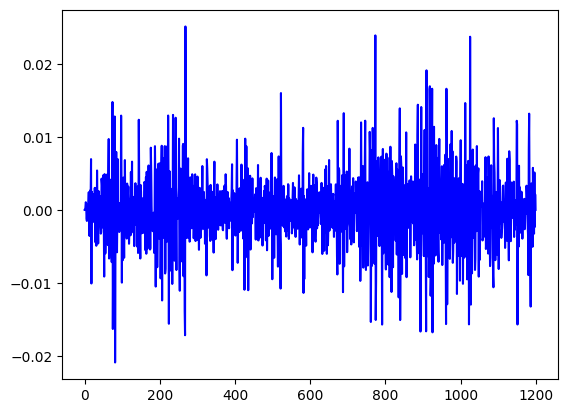

In [1449]:
plt.plot(arima_pred, color='blue')

In [1450]:
forecast = arima_fit.forecast(steps=30)

In [1451]:
forecast_index = pd.date_range(start=df_scaledData['Close_diff1'].index[-1], periods=30 + 1, freq='B')[1:]

Text(0.5, 1.0, 'ARIMA Model Forecast')

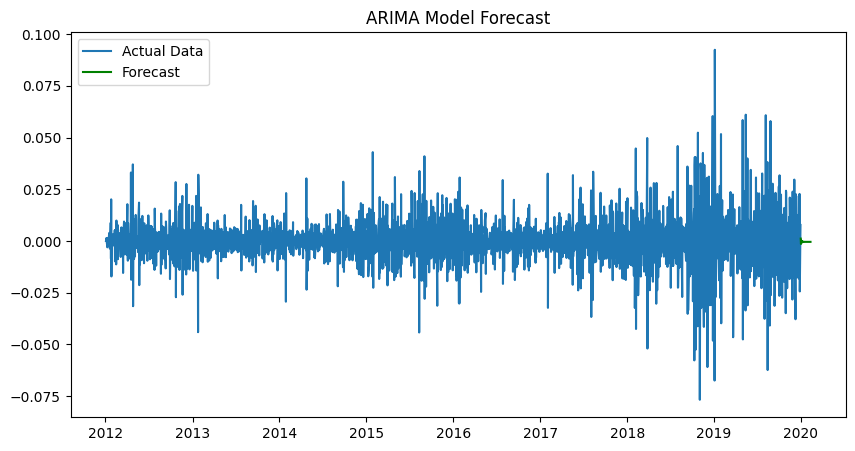

In [1452]:
# Plot forecast vs actual
plt.figure(figsize=(10,5))
plt.plot(df_scaledData['Close_diff1'], label="Actual Data")
plt.plot(forecast_index, forecast, label="Forecast", color='green')
plt.legend()
plt.title("ARIMA Model Forecast")

In [1453]:
y_test = df_scaledData['Close_diff1'][-30:]
y_pred = forecast[:30]
print(y_pred)

[ 0.00116066 -0.00142642  0.00024562 -0.00083503 -0.0001366  -0.000588
 -0.00029626 -0.00048481 -0.00036295 -0.00044171 -0.0003908  -0.0004237
 -0.00040244 -0.00041618 -0.0004073  -0.00041304 -0.00040933 -0.00041173
 -0.00041018 -0.00041118 -0.00041053 -0.00041095 -0.00041068 -0.00041086
 -0.00041074 -0.00041082 -0.00041077 -0.0004108  -0.00041078 -0.00041079]


In [1454]:
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 score: {r2}')

MAE: 0.013999387457458878
RMSE: 0.016762804037214606
R2 score: 0.007636177004364697


we infer RMSE is close to MAE, means the model doesn't have major outliers.

Low Error - Model is performing well but when compared to R2 score it is low so it is not good model. Finally we will compare results with other models to choose the best fit model.

**Multiple Linear regression**

In [1455]:
#Feature Extraction
X = df_scaledData[['Open_diff', 'High_diff', 'Low_diff']]  #Features
y = df_scaledData['Close_diff']  #Target variable

In [1456]:
#splitting dataset into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test size = 20%, train size = 80%

**Model Building**

In [1457]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [1458]:
#Predictions
y_pred = linear_model.predict(X_test)

In [1459]:
y_pred

array([ 1.93809487e-03, -1.54742455e-03,  4.76331288e-03, -6.05243372e-03,
        2.08803948e-03,  2.13081149e-03,  8.95004055e-03,  3.10140340e-03,
        4.05692805e-03,  4.62165192e-05, -4.60546502e-03, -9.84081046e-04,
        2.06575271e-03, -9.74738537e-04,  6.06102187e-03,  1.84171413e-03,
        1.01610973e-02,  6.18293251e-03,  3.74603631e-03,  3.42054656e-03,
       -2.49464292e-03,  4.76291178e-04,  3.57930838e-03,  7.40321514e-04,
       -2.47736387e-02, -6.25188042e-03, -4.50654623e-04, -3.24917788e-03,
        1.91782376e-04, -1.50706717e-03,  5.09958236e-03,  9.35503379e-03,
        2.93109364e-03,  3.21166183e-03, -7.64877713e-03, -8.49761224e-03,
       -3.70778942e-04, -2.87988426e-03, -2.25294171e-02,  7.61109921e-04,
        9.61517485e-04, -5.49293663e-04, -1.84331890e-03, -1.04749208e-02,
        1.36753139e-03, -3.21367935e-04, -5.79945470e-03,  7.56426231e-03,
        4.47315734e-03,  1.71580766e-03, -1.89617341e-02, -4.82390134e-03,
        7.43175356e-03,  

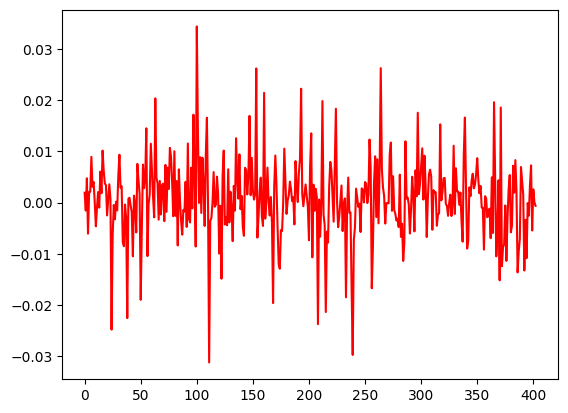

In [1460]:
plt.plot(y_pred, color='red')

**Model Evaluation**

In [1461]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

MAE: 0.003135670926904449
RMSE: 2.1508585435423058e-05
R² Score: 0.6973188505835775


we infer mean absolute error between predicted, actual values are very small that means predictions are close to actual values.

Lower RMSE indicates better fit.

**R2 score is nearly 70 percent so the model is good model.**

**RandomForestRegressor**

In [1462]:
#Feature Extraction
X = df_scaledData[['Open_diff', 'High_diff', 'Low_diff']]  #Features
y = df_scaledData['Close_diff']  #Target variable

In [1463]:
#splitting dataset into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test size = 20%, train size = 80%

In [1464]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [1465]:
y_pred = rf_model.predict(X_test)

In [1466]:
y_pred

array([-2.00861084e-04,  4.07637628e-04,  3.50607316e-03, -1.69537454e-03,
        9.01376297e-04,  1.29563710e-03,  6.33670202e-03,  1.56729845e-03,
        2.30759505e-03,  6.39666692e-04, -2.10156933e-04, -6.04126116e-05,
        8.33235561e-04,  1.02206401e-04,  3.75519115e-03,  1.36271733e-03,
        1.18148482e-02,  3.63930269e-03,  4.83106267e-03,  8.19529080e-04,
       -5.28341521e-03, -1.22992522e-04,  7.57366176e-04,  1.02966160e-03,
       -2.30107650e-02, -5.72937155e-03, -3.91768252e-03, -4.02522355e-04,
        6.68416194e-04,  1.02206401e-04,  3.40107698e-03,  1.10738261e-02,
        3.10412145e-03,  2.53928852e-03, -5.45538362e-03, -8.18056352e-03,
        4.63069482e-04, -6.30494307e-05, -2.32371710e-02, -8.24091395e-04,
       -9.88284484e-04,  2.05451604e-04, -1.24476905e-04, -1.10546422e-02,
        5.77648655e-04, -1.22992522e-04, -4.74522610e-03,  3.83876914e-03,
        3.50607316e-03,  3.51523251e-04, -1.90871506e-02, -4.05684374e-03,
        5.50086022e-03,  

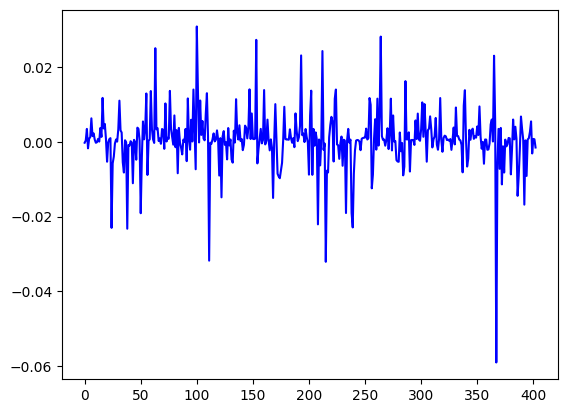

In [1467]:
plt.plot(y_pred, color='blue')

In [1468]:
rf_model.oob_score_

0.7330988904758651

In [1469]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

MAE: 0.003553125686327234
RMSE: 3.178647628163921e-05
R² Score: 0.5526824762274206


We infer it is good model oob score is 73%

R2 score is 55% it suggests that the model doesnt capture all the variability in the target variable to improve r2 score we will use different model.

**XGBoost - XGBRegressor**

In [1470]:
df_scaledData['Returns'] = df['Close'].pct_change()

In [1471]:
df_scaledData.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
SMA_40,0
SMA_80,0
CMA,0
Close_diff,0
SMA_50,0


In [1472]:
df_scaledData = df_scaledData.fillna(df_scaledData['Close_diff'].mean())

In [1473]:
df_scaledData.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
SMA_40,0
SMA_80,0
CMA,0
Close_diff,0
SMA_50,0


In [1474]:
#Feature Extraction
X = df_scaledData[['SMA_40', 'SMA_80', 'Returns']] #features
y = df_scaledData['Close_diff']

In [1475]:
#splitting dataset into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test size = 20%, train size = 80%

In [1476]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model Building**

In [1477]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depths=3, random_state=42)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:58:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depths" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_depths=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [1478]:
#predictions
y_pred = model.predict(X_test_scaled)

In [1479]:
y_pred

array([ 1.25832669e-03, -1.10955574e-04,  4.11225716e-03, -5.83762024e-03,
       -9.92417336e-04,  3.78817949e-03,  7.62371207e-03,  5.95045928e-03,
        2.16001482e-03, -6.93615875e-05, -4.36506839e-03, -1.20260092e-05,
       -7.61038042e-04, -4.76106536e-04,  6.68944558e-03,  2.31100619e-03,
        1.20344646e-02,  9.17780213e-03,  3.99222411e-03,  4.01977962e-03,
       -1.23453671e-02,  5.80760359e-04, -5.20027243e-04, -7.00516067e-03,
       -1.43340277e-02, -4.09609824e-03,  2.29160348e-03, -3.40746832e-03,
        2.12778267e-03,  2.54263473e-03,  2.74244952e-03,  2.80759353e-02,
        4.09456156e-03,  9.54341050e-03, -4.56376048e-03, -6.30104216e-03,
        1.39148804e-04, -2.01478181e-03, -2.38458477e-02,  2.77204835e-03,
        1.20483646e-02, -4.17163502e-03, -3.47317359e-03, -3.11019202e-03,
        2.08308385e-03, -6.74009134e-05, -6.82737492e-03,  4.55500558e-03,
        4.64041019e-03, -2.60378956e-03, -1.51913865e-02, -3.91692715e-03,
       -2.32928130e-03,  

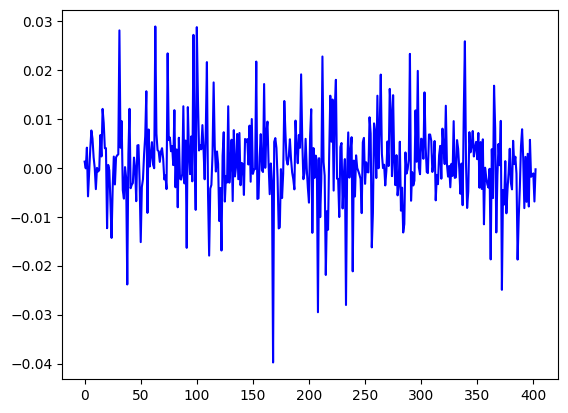

In [1480]:
plt.plot(y_pred, color='blue')

**Model Evaluation**

In [1481]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

MAE: 0.0005219637618548878
RMSE: 1.8870102390427774e-06
R² Score: 0.9734449097162213


we infer mean absolute error between predicted, actual values are very small that means predictions are close to actual values.

Lower RMSE indicates better fit.

**R2 score is 97 percent** as it is close to 100 percent it is an **excellent model and the predictions can be more accurate.**

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd

# Load dataset again
df = pd.read_csv(r"C:\Users\hp\Downloads\Stock market analysis\AAPL.csv")

# Split data into features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Close']]
y = df[['Close']]
 # You can also train for all prices separately

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Models
mlr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

mlr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

print("✅ Models trained successfully!")


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


✅ Models trained successfully!


In [7]:
import pickle

# Save models
pickle.dump(mlr_model, open("mlr_model.pkl", "wb"))
pickle.dump(rf_model, open("rf_model.pkl", "wb"))
pickle.dump(xgb_model, open("xgb_model.pkl", "wb"))
